In [1]:
import numpy as np
import pandas as pd

uda_pre = np.load('uda_pre.npy')
uda_true = np.load('uda_true.npy')
uda_pool = np.load('uda_pool.npy')

distill_pre = np.load('distill_pre.npy')
distill_true = np.load('distill_true.npy')
distill_pool = np.load('distill_pool.npy')


In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
tsne = TSNE(n_components=2, init="pca", random_state=0)
all_pool = np.concatenate((uda_pool, distill_pool))
print(all_pool.shape)
all_tsne = tsne.fit_transform(all_pool)
# uda_tsne=tsne.fit_transform(uda_pool)
# distill_tsne=tsne.fit_transform(distill_pool)


(10000, 768)


/Users/chenqiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/chenqiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [4]:
uda_tsne = all_tsne[:5000]
distill_tsne = all_tsne[5000:]
print(distill_tsne.shape)
print(uda_tsne.shape)


(5000, 2)
(5000, 2)


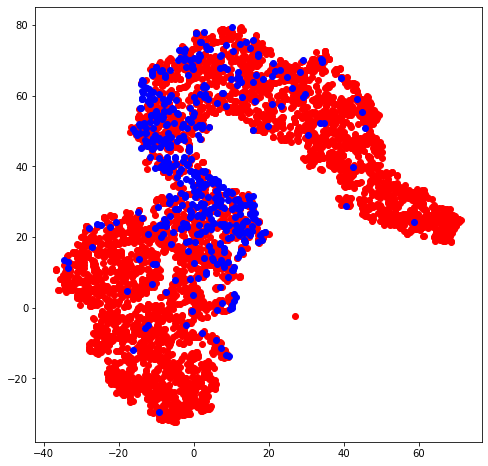

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(uda_tsne[:, 0][uda_pre == uda_true],
            uda_tsne[:, 1][uda_pre == uda_true], c='r')
plt.scatter(uda_tsne[:, 0][uda_pre != uda_true],
            uda_tsne[:, 1][uda_pre != uda_true], c='b')


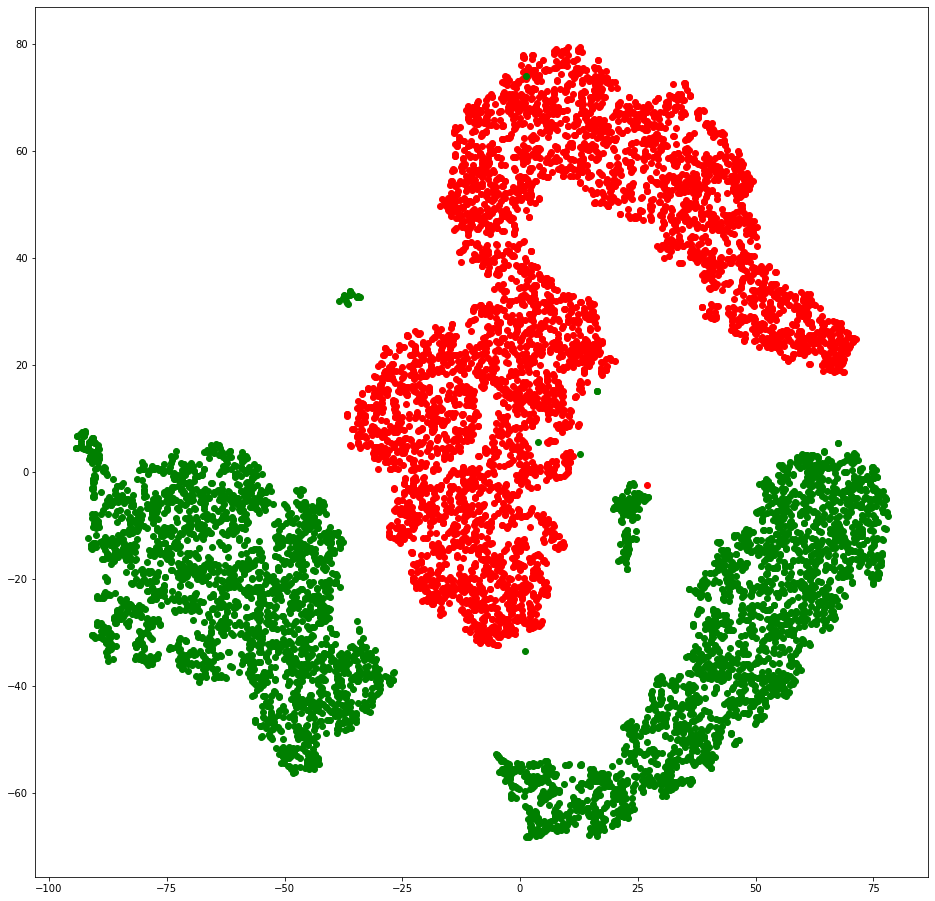

In [6]:
plt.figure(figsize=(16, 16))
plt.scatter(uda_tsne[:, 0], uda_tsne[:, 1], c='r')
plt.scatter(distill_tsne[:, 0], distill_tsne[:, 1], c='g')


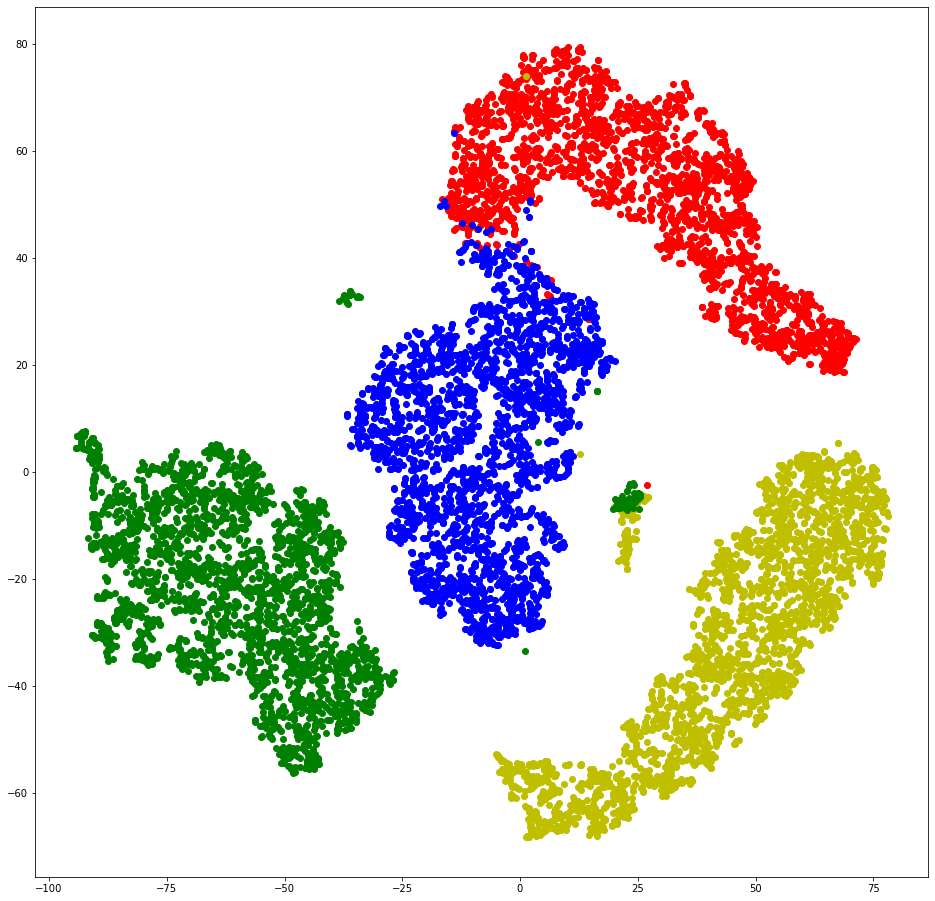

In [7]:
plt.figure(figsize=(16, 16))
plt.scatter(uda_tsne[:, 0][uda_pre == 1], uda_tsne[:, 1][uda_pre == 1], c='r')
plt.scatter(uda_tsne[:, 0][uda_pre != 1], uda_tsne[:, 1][uda_pre != 1], c='b')

plt.scatter(distill_tsne[:, 0][distill_pre == 1],
            distill_tsne[:, 1][distill_pre == 1], c='y')
plt.scatter(distill_tsne[:, 0][distill_pre != 1],
            distill_tsne[:, 1][distill_pre != 1], c='g')


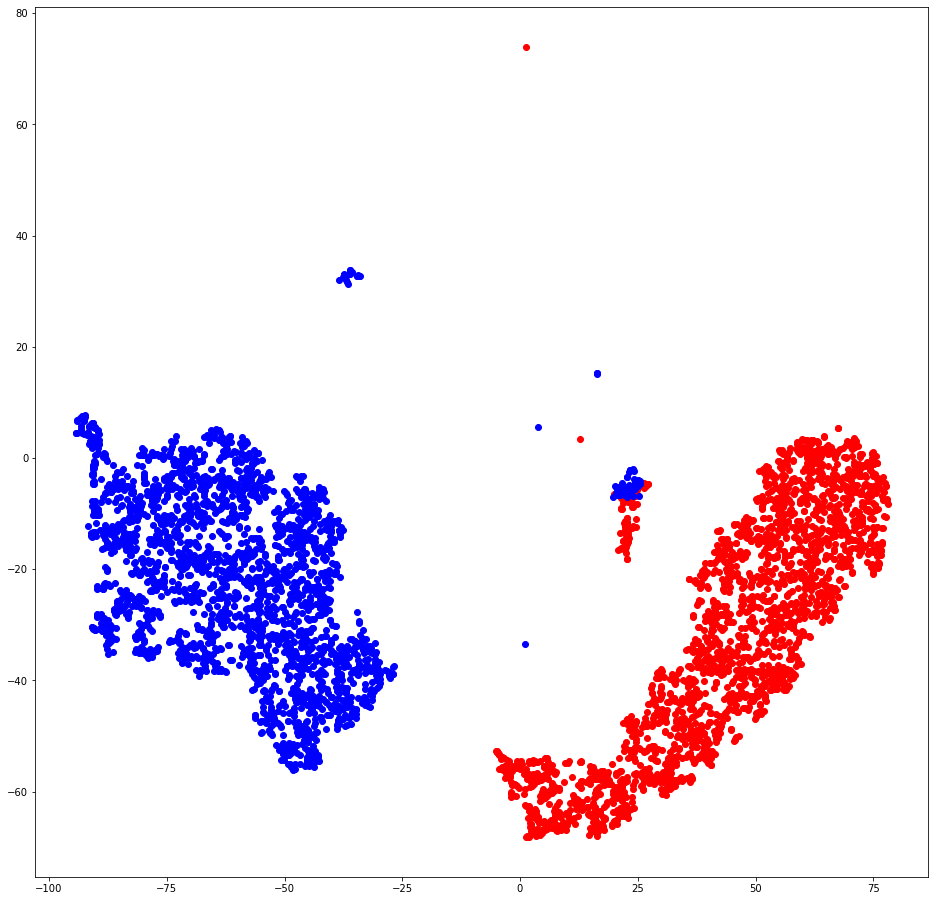

In [8]:
plt.figure(figsize=(16, 16))
plt.scatter(distill_tsne[:, 0][distill_pre == 1],
            distill_tsne[:, 1][distill_pre == 1], c='r')
plt.scatter(distill_tsne[:, 0][distill_pre != 1],
            distill_tsne[:, 1][distill_pre != 1], c='b')


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_all = pca.fit_transform(all_pool)
uda_pca = pca_all[:5000]
distill_pca = pca_all[5000:]


In [11]:
print(uda_pca.shape)
print(distill_pca.shape)


(5000, 2)
(5000, 2)


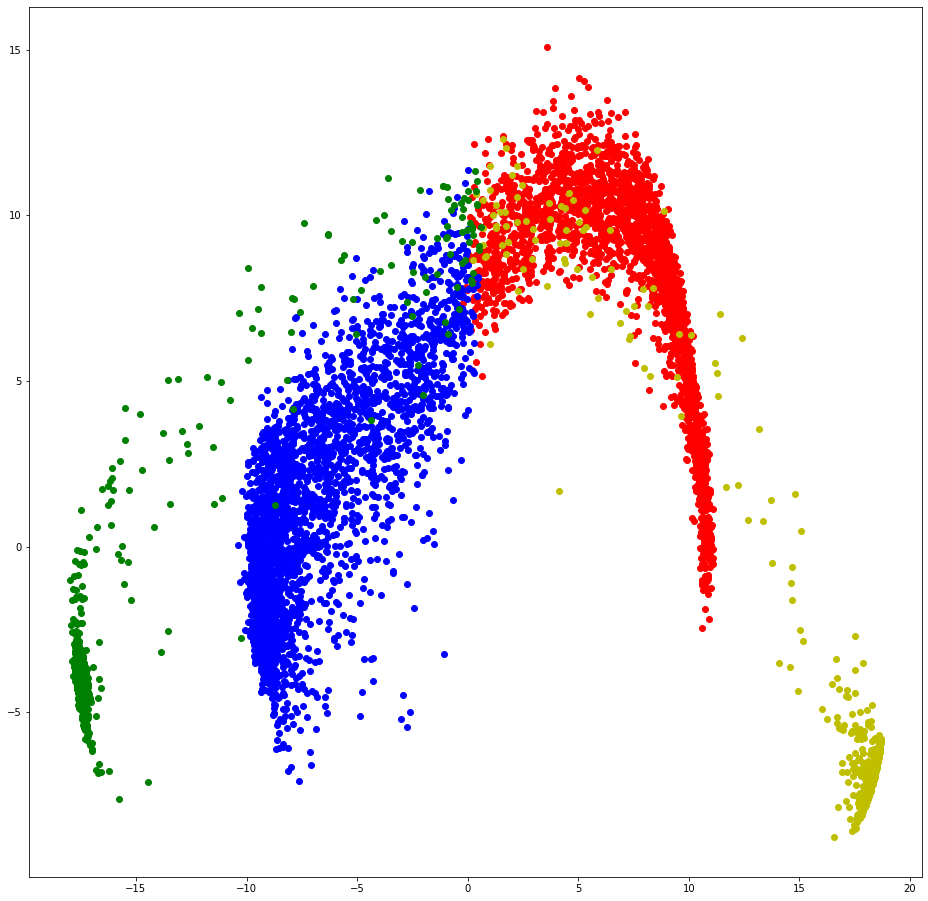

In [10]:
plt.figure(figsize=(16, 16))
plt.scatter(uda_pca[:, 0][uda_pre == 1], uda_pca[:, 1][uda_pre == 1], c='r')
plt.scatter(uda_pca[:, 0][uda_pre != 1], uda_pca[:, 1][uda_pre != 1], c='b')

plt.scatter(distill_pca[:, 0][distill_pre == 1],
            distill_pca[:, 1][distill_pre == 1], c='y')
plt.scatter(distill_pca[:, 0][distill_pre != 1],
            distill_pca[:, 1][distill_pre != 1], c='g')


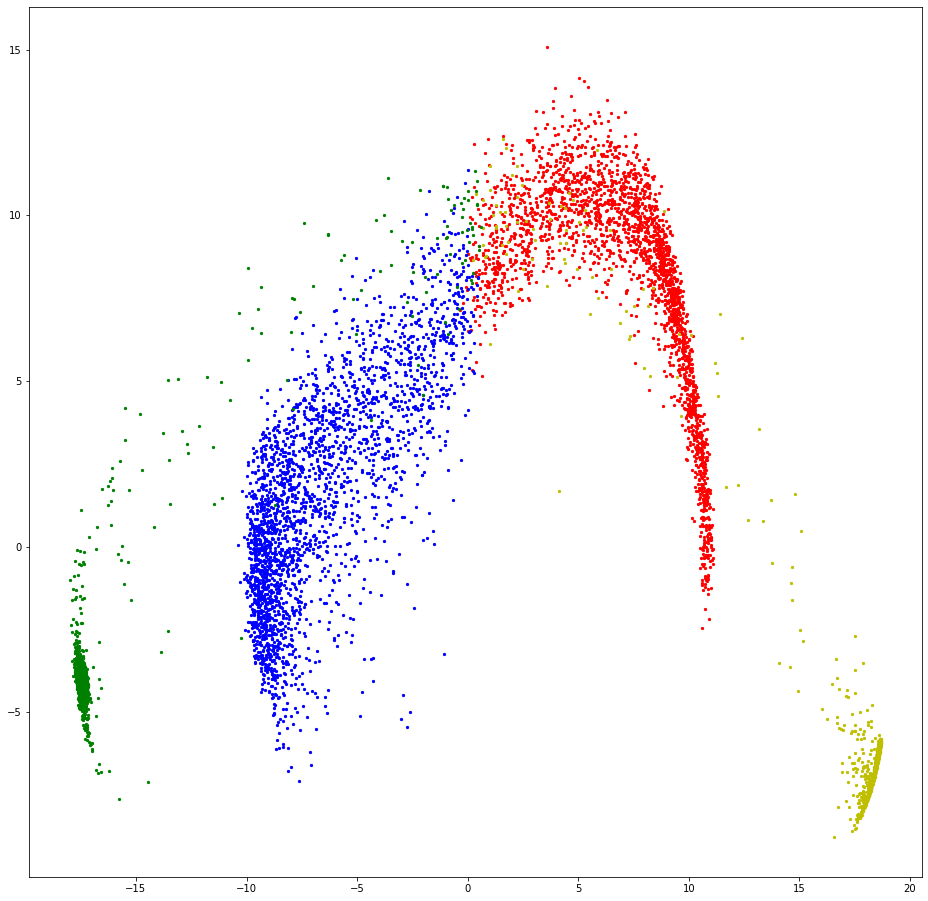

In [26]:
plt.figure(figsize=(16, 16))
plt.scatter(uda_pca[:, 0][uda_pre == 1],
            uda_pca[:, 1][uda_pre == 1], c='r', s=5)
plt.scatter(uda_pca[:, 0][uda_pre != 1],
            uda_pca[:, 1][uda_pre != 1], c='b', s=5)

plt.scatter(distill_pca[:, 0][distill_pre == 1],
            distill_pca[:, 1][distill_pre == 1], c='y', s=5)
plt.scatter(distill_pca[:, 0][distill_pre != 1],
            distill_pca[:, 1][distill_pre != 1], c='g', s=5)


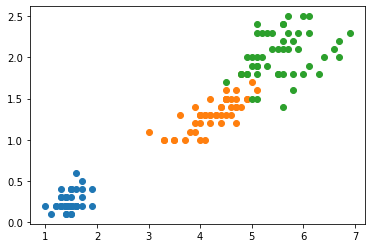

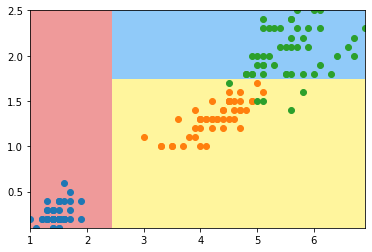

In [29]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
# 加载鸢尾花卉数据集
iris = datasets.load_iris()
X = iris.data[:, 2:]  # 这是两个指标
y = iris.target  # 三个类别
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()
# 绘制决策边界


def plot_decision_boundary(model, x):
    # 生成网格点坐标矩阵,得到两个矩阵
    M, N = 500, 500
    x0, x1 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), M), np.linspace(
        x[:, 1].min(), x[:, 1].max(), N))
    X_new = np.c_[x0.ravel(), x1.ravel()]
#   X_new = np.stack((x0.flat, x1.flat), axis=1)
    y_predict = model.predict(X_new)
    z = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, z, cmap=custom_cmap)  # 等高线
    #plt.pcolormesh(x0, x1, z, cmap=custom_cmap)


# 决策树
TREE = DecisionTreeClassifier(
    max_depth=2, criterion="entropy", random_state=42)
TREE.fit(X, y)
TREE.score(X, y)
# 画图
plot_decision_boundary(TREE, X)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
